# COMPTE RENDU TP 1

Generating Dataset: 

250 Samples using gaussian distribution. 
Like we saw in class we will be using "make_blobs" from sklearn.datasets. 
We will be defining our centers following our Gaussian distributions: [-1 0] and [1 0]. and we will be assyining to each group of samples their y class.

Code:

In [184]:
#importing libraries
from sklearn import datasets
import numpy as np



#Parameters of the two gaussian distributions: 
centers = [(-1,0), (1,0)]
cluster_std = 0.5

#Dataset Generation using make_blobs
X, y = datasets.make_blobs(n_samples=250,centers=centers, cluster_std=cluster_std)

#Assigning the Ys to each halves of our data set:
#1st 125 samples:
y[:125] = -1
#2nd 125 samples
y[125:] = 0

Now that we generated our dataset, we are required to shuffle it and divide it into two sets one is for training and the other is for testing. Respectively: 80% then 20%

In [185]:
from sklearn.model_selection import train_test_split
from sklearn import utils


# Shuffling our dataset
X_shuffled, y_shuffled = utils.shuffle(X, y, random_state=42)

# Using Split method, we will be creating the train set and the test set (0.2): 
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

Implementation of pereptron algorithm on the dataset

In [186]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Training the perceptron model on the training set
clf = Perceptron(random_state=42)
clf.fit(X_train, y_train)

# Predicting the  labels of the testing set using our trained model
y_pred = clf.predict(X_test)

# Calculating the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.52




Now that we implemented the pereptron on our dataset we will carry on to the experiences presented on our paper: 

EXPERIENCE 1

We will be generating a dataset with a gaussian distribution having σ = 0.25

Like we generated our dataset, we will follow the same steps but we will be changing the cluster_std to 0.25

In [187]:
#our Parameters:
centers = [(-1, 0), (1, 0)]
cluster_std = 0.25

#dataset generation
X, y = datasets.make_blobs(n_samples= 250, centers= centers, cluster_std=cluster_std)

#Assigning Ys to samples:
#1st Half:
y [:125] = -1
#2nd Half:
y [125:] = 0

Let's implement perceptron

Accuracy: 0.52


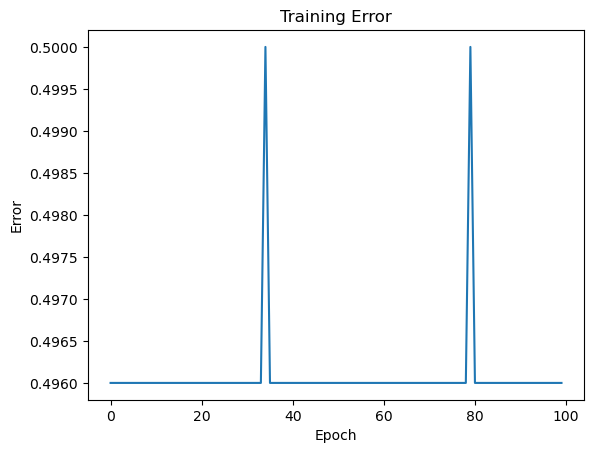

In [188]:
import matplotlib.pyplot as plt

# Shuffling our dataset
X_shuffled, y_shuffled = utils.shuffle(X, y, random_state=42)

# Using Split method, we will be creating the train set and the test set (0.2): 
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

# Train the perceptron model 
clf = Perceptron(random_state=42)
clf.fit(X_train, y_train)

# Calculating the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

n_epochs = 100
errors = []
accuracies = []
for epoch in range(n_epochs):
    clf.partial_fit(X, y, classes=np.unique(y))
    y_pred = clf.predict(X)
    error = np.mean(y_pred != y)
    accuracy = clf.score(X, y)
    errors.append(error)
    accuracies.append(accuracy)

# Plot the training error and accuracy over time
plt.plot(errors)
plt.title("Training Error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()



Seeing the graphs in hand, Perceptron is not converging and there is room for improvement. 
The error is oscillating on 0.4960 which a non-zero value which makes us understand that the algorithm is not converging.
This could be due to the defined learning rate that doesn't seem to be appropriate. Since gaussian distribution with different means and equal variance is linearly separable but the algorithm is not converging, this means that our algorithm couldn't find  a set of weights that correctly classifies all the training examples. 

visualizing the decision boundary found by the Perceptron algorithm

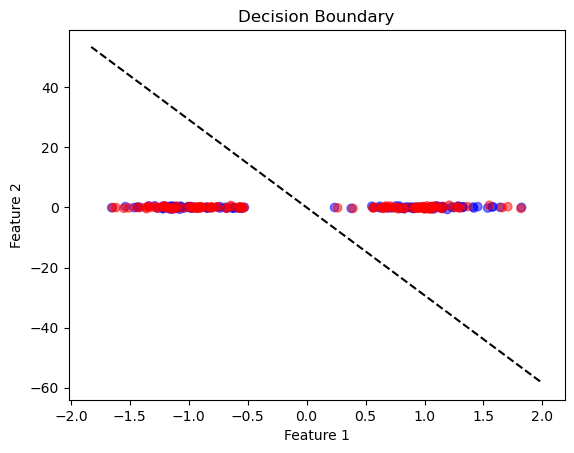

In [191]:

# Get the weights learned by the model
w = clf.coef_[0]
b = clf.intercept_

# Compute the slope and y-intercept of the decision boundary
slope = -w[0] / w[1]
intercept = -b / w[1]

# Plot the decision boundary and the training examples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.5)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
x_vals = np.array([xlim[0], xlim[1]])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--k')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


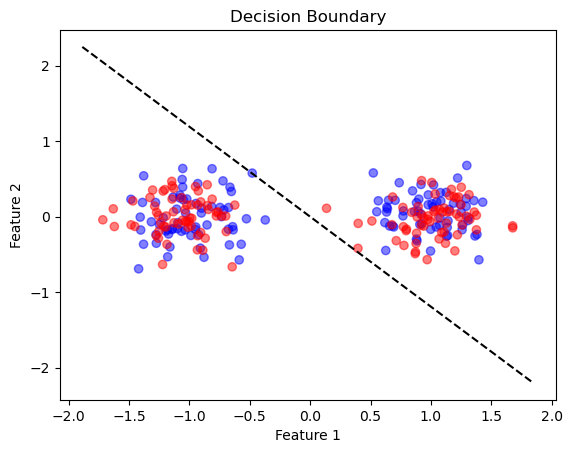

In [196]:
#our Parameters:
centers = [(-1, 0), (1, 0)]
cluster_std = 0.25

#dataset generation
X, y = datasets.make_blobs(n_samples= 250, centers= centers, cluster_std=cluster_std)

#Assigning Ys to samples:
#1st Half:
y [:125] = -1
#2nd Half:
y [125:] = 0


# Shuffling our dataset
X_shuffled, y_shuffled = utils.shuffle(X, y, random_state=20)

# Using Split method, we will be creating the train set and the test set (0.2): 
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=20)


# Train the perceptron model 
clf = Perceptron(random_state=20)
clf.fit(X_train, y_train)
# Get the weights learned by the model
w = clf.coef_[0]
b = clf.intercept_

# Compute the slope and y-intercept of the decision boundary
slope = -w[0] / w[1]
intercept = -b / w[1]

# Plot the decision boundary and the training examples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.5)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
x_vals = np.array([xlim[0], xlim[1]])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--k')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()






Here we used the same data set, with dividing it into two sets of train and test. we can see that the decision boundary did NOT change. we can therefore say it's unique.

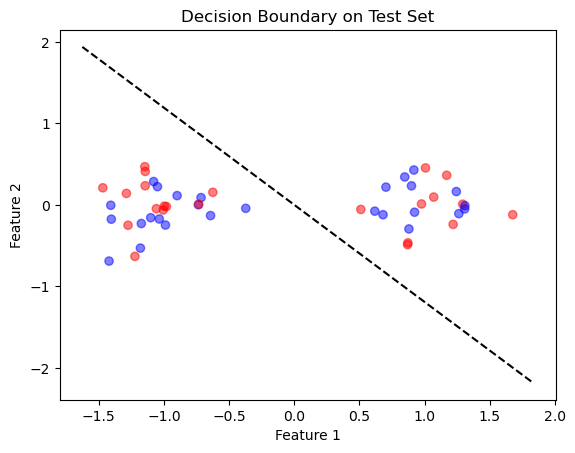

In [197]:

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', alpha=0.5)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
x_vals = np.array([xlim[0], xlim[1]])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--k')
plt.title("Decision Boundary on Test Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [198]:
# Compute the accuracy of the model on the test set
accuracy = clf.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.5


2 ND EXPERIENCE:  

Data set: the same with a varience of 0.75

In [199]:
#our Parameters:
centers = [(-1, 0), (1, 0)]
cluster_std = 0.75

#dataset generation
X, y = datasets.make_blobs(n_samples= 250, centers= centers, cluster_std=cluster_std)

#Assigning Ys to samples:
#1st Half:
y [:125] = -1
#2nd Half:
y [125:] = 0

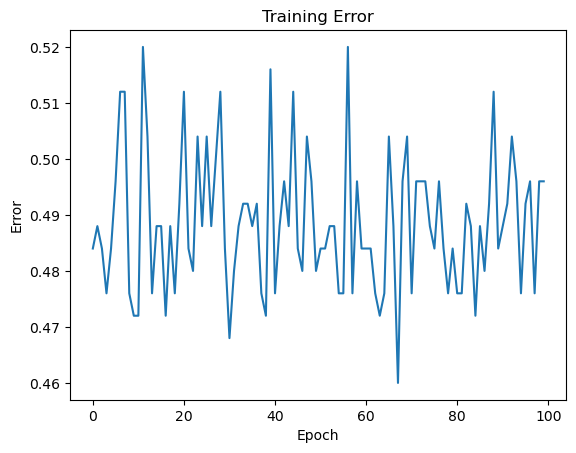

In [200]:
X_shuffled, y_shuffled = utils.shuffle(X, y, random_state=42)

# Using Split method, we will be creating the train set and the test set (0.2): 
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

# Train the perceptron model 
clf = Perceptron(random_state=42)
clf.fit(X_train, y_train)

n_epochs = 100
errors = []
accuracies = []
for epoch in range(n_epochs):
    clf.partial_fit(X, y, classes=np.unique(y))
    y_pred = clf.predict(X)
    error = np.mean(y_pred != y)
    accuracy = clf.score(X, y)
    errors.append(error)
    accuracies.append(accuracy)

# Plot the training error and accuracy over time
plt.plot(errors)
plt.title("Training Error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

 The oscilations prove that perceptron is not converging.

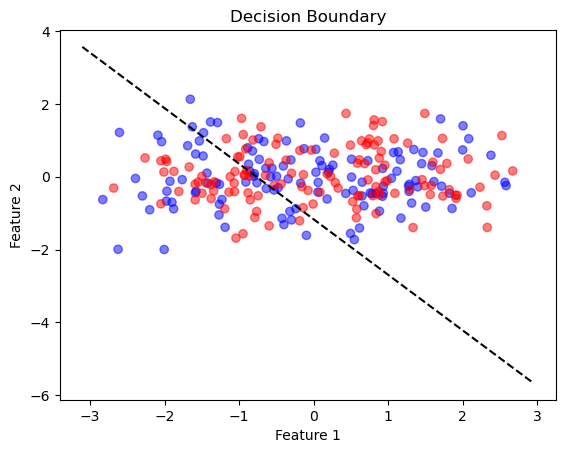

In [201]:

# Get the weights learned by the model
w = clf.coef_[0]
b = clf.intercept_

# Compute the slope and y-intercept of the decision boundary
slope = -w[0] / w[1]
intercept = -b / w[1]

# Plot the decision boundary and the training examples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.5)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
x_vals = np.array([xlim[0], xlim[1]])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--k')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


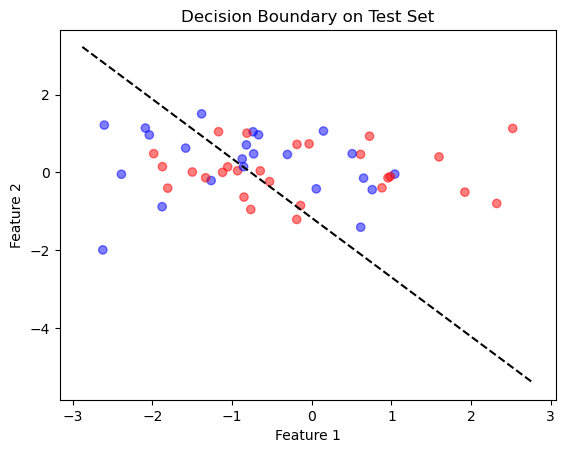

In [202]:

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', alpha=0.5)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
x_vals = np.array([xlim[0], xlim[1]])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--k')
plt.title("Decision Boundary on Test Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [203]:
# Compute the accuracy of the model on the test set
accuracy = clf.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.48


3RD EXPERIENCE

In [204]:

#Parameters of the two gaussian distributions: 
centers = [(-1,0), (1,0)]
cluster_std = 0.9

#Dataset Generation using make_blobs
X, y = datasets.make_blobs(n_samples=250,centers=centers, cluster_std=cluster_std)

#Assigning the Ys to each halves of our data set:
#1st 125 samples:
y[:125] = -1
#2nd 125 samples
y[125:] = 0

In [205]:

# Shuffling our dataset
X_shuffled, y_shuffled = utils.shuffle(X, y, random_state=42)

# Using Split method, we will be creating the train set and the test set (0.2): 
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

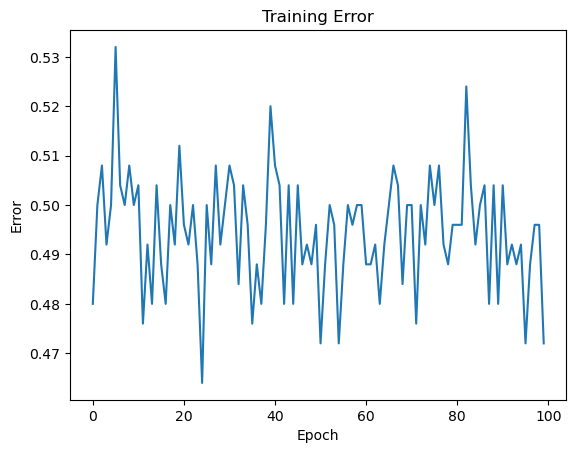

In [206]:

# Train the perceptron model 
clf = Perceptron(random_state=42)
clf.fit(X_train, y_train)

n_epochs = 100
errors = []
accuracies = []
for epoch in range(n_epochs):
    clf.partial_fit(X, y, classes=np.unique(y))
    y_pred = clf.predict(X)
    error = np.mean(y_pred != y)
    accuracy = clf.score(X, y)
    errors.append(error)
    accuracies.append(accuracy)

# Plot the training error and accuracy over time
plt.plot(errors)
plt.title("Training Error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

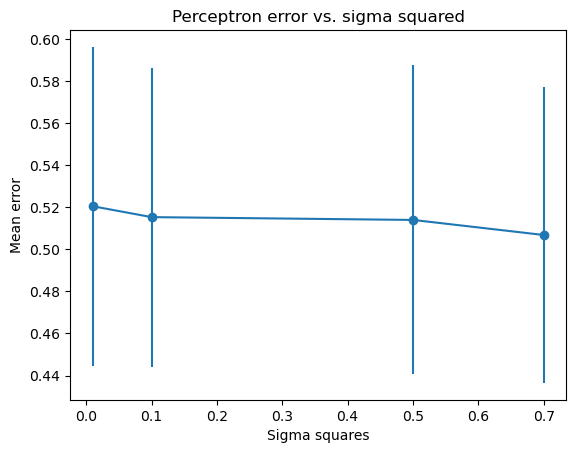

In [207]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(42)

# Set the parameters for the two Gaussian distributions
centers = [(-1, 0), (1, 0)]

# Define the values of sigma squared to test
sigma_squares = [0.01, 0.1, 0.5, 0.7]

# Set the number of experiments to run
n_experiments = 30

# Create a dictionary to store the errors for each combination of sigma squared values
errors = {}

# Loop over the sigma squared values
for sigma1_sq in sigma_squares:
    for sigma2_sq in sigma_squares:
        # Create an empty list to store the errors for this combination of sigma squared values
        error_list = []
        
        # Loop over the number of experiments
        for i in range(n_experiments):
            # Generate the dataset using the make_blobs function
            X, y = make_blobs(n_samples=250, centers=centers, cluster_std=[np.sqrt(sigma1_sq), np.sqrt(sigma2_sq)])

            # Assign the labels y=-1 to the first 125 samples and y=1 to the second 125 samples
            y[:125] = -1
            y[125:] = 0

            # Split the dataset into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

            # Train the perceptron model on the training set
            clf = Perceptron(random_state=42)
            clf.fit(X_train, y_train)

            # Compute the error of the model on the test set
            error = 1 - clf.score(X_test, y_test)
            error_list.append(error)
        
        # Store the errors for this combination of sigma squared values in the dictionary
        errors[(sigma1_sq, sigma2_sq)] = error_list

# Compute the mean and variance of the errors for each combination of sigma squared values
mean_errors = []
var_errors = []
for sigma1_sq in sigma_squares:
    error_list = []
    for sigma2_sq in sigma_squares:
        error_list += errors[(sigma1_sq, sigma2_sq)]
    mean_error = np.mean(error_list)
    var_error = np.var(error_list)
    mean_errors.append(mean_error)
    var_errors.append(var_error)

# Plot the mean errors and error bars for each sigma squared value
plt.errorbar( sigma_squares, mean_errors, yerr=np.sqrt(var_errors), fmt='o-')
plt.xlabel('Sigma squares')
plt.ylabel('Mean error')
plt.title('Perceptron error vs. sigma squared')
plt.show()
